In [6]:
import torch
import torchvision

In [7]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [8]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_test, shuffle=True)

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [12]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [13]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


In [14]:
def train(epoch):
  network.train()
  i =0 
  for batch_idx, (data, target) in enumerate(train_loader):
    i+=1
    optimizer.zero_grad()
    output = network(data)
    print(i)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [76]:
print(len(train_loader))

938


In [16]:
prediction = []
image_list = []

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      image_list.append(data)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      prediction.append(pred)
      correct += pred.eq(target.data.view_as(pred)).sum()

  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [17]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-11-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


1
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.038379
2
3
4
5
6
7
8
9
10
11
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.894982
12
13
14
15
16
17
18
19
20
21
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.978856
22
23
24
25
26
27
28
29
30
31
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.701902
32
33
34
35
36
37
38
39
40
41
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.791902
42
43
44
45
46
47
48
49
50
51
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.786420
52
53
54
55
56
57
58
59
60
61
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.884543
62
63
64
65
66
67
68
69
70
71
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.031465
72
73
74
75
76
77
78
79
80
81
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.808686
82
83
84
85
86
87
88
89
90
91
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.667236
92
93
94
95
96
97
98
99
100
101
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.714515
102
103
104
105
106
107
108
109
110
111
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.737810
112
113
114
115
116
117
118
119
120
121
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.995120


c:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1695, Accuracy: 9474/10000 (95%)

1
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.329538
2
3
4
5
6
7
8
9
10
11
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.139184
12
13
14
15
16
17
18
19
20
21
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.234835
22
23
24
25
26
27
28
29
30
31
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.393693
32
33
34
35
36
37
38
39
40
41
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.518279
42
43
44
45
46
47
48
49
50
51
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.381914
52
53
54
55
56
57
58
59
60
61
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.307677
62
63
64
65
66
67
68
69
70
71
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.357738
72
73
74
75
76
77
78
79
80
81
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.404461
82
83
84
85
86
87
88
89
90
91
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.229989
92
93
94
95
96
97
98
99
100
101
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.519791
102
103
104
105
106
107
108
109
110
111
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.437441
112
113
114
115
116
117
118
119

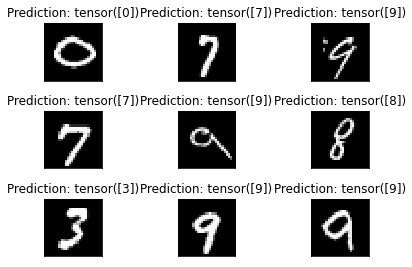

In [21]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(image_list[9][i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    prediction[9][i]))
  plt.xticks([])
  plt.yticks([])